# Analysis of combined jobs final

##Importing Necessary Libraries

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd  # Importing pandas library for data manipulation
import numpy as np  # Importing numpy library for numerical operations and array handling
import plotly.express as px  # Importing plotly express for interactive plotting and visualization
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for encoding categorical variables
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for classification using ensemble method
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression for logistic regression classification
from sklearn.neighbors import KNeighborsClassifier  # Importing KNeighborsClassifier for K-nearest neighbors classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Importing metrics for evaluating classification models.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Combined_Jobs_Final.csv.zip')

In [ ]:
url = '/content/drive/MyDrive/Combined_Jobs_Final.csv.zip'
df = pd.read_csv(url)


##Data Exploration

In [ ]:
df.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [ ]:
df.tail()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
84085,82,1,open,san-francisco-ca-national-japanese-american-hi...,Book Keeper @ National Japanese American Histo...,Book Keeper,National Japanese American Historical Society,San Francisco,California,CA,...,Office Administration,NJAHS stands for National Japanese American Hi...,NaN,20.00,NaN,NaN,Part-Time,NaN,2013-03-20 06:35:01 UTC,2014-08-16 15:35:27 UTC
84086,83,1,open,larkspur-ca-emporio-rulli-kitchen-staff-chef,Kitchen Staff/Chef @ Emporio Rulli,Kitchen Staff/Chef,Emporio Rulli,Larkspur,California,CA,...,Food and Beverages,Weekend Brunch Line Cook \r\n● Other shifts ma...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-03-20 08:06:43 UTC,2014-08-16 15:35:27 UTC
84087,84,1,open,san-francisco-ca-onigilly-driver-84,Driver @ Onigilly,Driver,Onigilly,San Francisco,California,CA,...,Food and Beverages,ONIGILLY (Japanese rice ball wraps) seeks outg...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-03-12 01:47:13 UTC,2014-08-16 15:35:27 UTC
84088,88,1,open,san-francisco-ca-machka-restaurants-corp-line-...,Line Cook @ Machka Restaurants Corp.,Line Cook,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean restaurant in F...,NaN,13.00,NaN,NaN,Part-Time,NaN,2013-07-16 08:55:22 UTC,2014-08-16 15:35:28 UTC
84089,92,1,open,san-jose-ca-kazoo-restaurant-cashier,Cashier @ Kazoo Restaurant,Cashier,Kazoo Restaurant,San Jose,California,CA,...,Food and Beverages,We are looking for a cashier! \r\n\r\n ● Take...,NaN,10.00,NaN,NaN,Part-Time,NaN,2013-03-27 09:35:04 UTC,2014-08-16 15:35:30 UTC


In [ ]:
df.info() #finding basic information of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job.ID              84090 non-null  int64  
 1   Provider            84090 non-null  int64  
 2   Status              84090 non-null  object 
 3   Slug                84090 non-null  object 
 4   Title               84090 non-null  object 
 5   Position            84090 non-null  object 
 6   Company             81819 non-null  object 
 7   City                83955 non-null  object 
 8   State.Name          83919 non-null  object 
 9   State.Code          83919 non-null  object 
 10  Address             36 non-null     object 
 11  Latitude            84090 non-null  float64
 12  Longitude           84090 non-null  float64
 13  Industry            267 non-null    object 
 14  Job.Description     84034 non-null  object 
 15  Requirements        0 non-null      float64
 16  Sala

In [ ]:
df = df[['Title', 'Job.Description']]

In [ ]:
df.head(3)

,Title,Job.Description
0,Server @ Tacolicious,Tacolicious' first Palo Alto store just opened...
1,Kitchen Staff/Chef @ Claude Lane,\r\n\r\nNew French Brasserie in S.F. Financia...
2,Bartender @ Machka Restaurants Corp.,We are a popular Mediterranean wine bar and re...


In [ ]:
df['Title'][1]

'Kitchen Staff/Chef @ Claude Lane'

In [ ]:
df['Job.Description'][1]

' \r\n\r\nNew French Brasserie in S.F. Financial District Seeks Chef\r\nWe are seeking an energetic, dynamic chef to take charge and grow with our company. Our ideal candidate is a motivated self-starter, has a great work ethic and is ready for the challenge of building their own team with executive support. \r\n\r\nThis position is a perfect fit for a talented chef ready to take the next step, someone who can multi task in a high volume kitchen and has exceptional organizational skills. Position requirements are experience with French cuisine, a minimum of 5 years as a sous chef in high volume, full service restaurant. He or she must be a team player, leading by example and working side by side with other members of the team. \r\n\r\nComputer and management skills are a must, as are experience in ordering, inventory and cost control. The right candidate will have previously demonstrated an understanding of leadership and accountability, and an infectious, energetic approach to problem

In [ ]:
df = df.sample (n=1000,random_state=42)
df.shape

(1000, 2)

In [ ]:
import nltk
from  nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:
ps = PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def cleaning(txt):
  cleaned_txt = re.sub(r'[^a-zA-Z0-9\s]','',txt)
  tokens = nltk.word_tokenize(cleaned_txt.lower())
  stemming = [ps.stem(word)for word in tokens if word not in stopwords.words('english')]

  return " ".join(stemming)

In [ ]:
cleaning('this is my book with 0987 digits loving moving driven and \n\n\r &^%')

'book 0987 digit love move driven'

In [ ]:
df['Title'] = df['Title'].apply(lambda x:cleaning(x))
df['Job.Description'] = df['Job.Description'].astype(str).apply(lambda x:cleaning(x))

In [ ]:
df['Job.Description'][64119]

'job summari knowledg univers ku site director site leader inspir children teacher alik learn grow passion educ excel confid teach children adult use nation recogn curriculum framework creat uniqu engag classroom experi commit make site success know meaning relationship children famili team import success fulli engag enthusiast work eager share knowledg other job respons essenti function basic expect site director cours creativ new way meet exceed expect encourag long requir essenti function also met supervis children staff record keep licens record child file lesson plan implement mainten safe welcom classroom environ build relationship commun school recruit new student program applic must strong organiz skill'

In [ ]:
df['new col'] = df['Title'] + " " + df['Job.Description']

In [ ]:
df.head(3)

,Title,Job.Description,new col
64119,site director knowledg univers,job summari knowledg univers ku site director ...,site director knowledg univers job summari kno...
35827,administr assist officeteam,ref id 03110118480classif secretaryadmin asstc...,administr assist officeteam ref id 03110118480...
72100,account manag chi payment system,yoursquor energet motiv hardwork look prosper ...,account manag chi payment system yoursquor ene...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfif = TfidfVectorizer()
matrix = tfif.fit_transform(df['new col'])
similarity = cosine_similarity(matrix)

In [ ]:
similarity

array([[1.        , 0.04042121, 0.02576217, ..., 0.05812558, 0.02553415,
        0.08439393],
       [0.04042121, 1.        , 0.02654339, ..., 0.03223153, 0.0051686 ,
        0.02355136],
       [0.02576217, 0.02654339, 1.        , ..., 0.05841122, 0.03157436,
        0.03907004],
       ...,
       [0.05812558, 0.03223153, 0.05841122, ..., 1.        , 0.06388816,
        0.1154483 ],
       [0.02553415, 0.0051686 , 0.03157436, ..., 0.06388816, 1.        ,
        0.38480582],
       [0.08439393, 0.02355136, 0.03907004, ..., 0.1154483 , 0.38480582,
        1.        ]])

In [ ]:
enumerate(similarity[0])

In [ ]:
df.columns = df.columns.str.strip()

In [230]:
sorted(list(enumerate(similarity[0])), key=lambda x: x[1], reverse=True)[1:20]

[(276, 0.9939215423960107),
 (730, 0.5301661350898537),
 (81, 0.5109964007032951),
 (917, 0.5109964007032951),
 (252, 0.28102651855400723),
 (128, 0.2453122350947322),
 (360, 0.2379138204539952),
 (825, 0.2052694297802546),
 (629, 0.20115876820344714),
 (245, 0.19062348531860984),
 (38, 0.18007342197651222),
 (254, 0.1701903938731881),
 (469, 0.15843747912036293),
 (965, 0.15473370123724825),
 (319, 0.15453037689897423),
 (114, 0.15279819595099048),
 (655, 0.15100516882692633),
 (59, 0.1473110275288165),
 (298, 0.14632078731190057)]


 Recommmendation system

In [231]:
def recommend(title):

        indx = job_df[job_df['Title'] == title].index[0]
        indx = job_df.index.get_loc(indx)
        distances = sorted(list(enumerate(similarity[indx])), key=lambda x: x[1], reverse=True)[1:20]

        jobs = []
        for i in distances:
            jobs.append(job_df.iloc[i[0]].Title)
        return jobs

In [232]:
recommend('site director knowledg univers')

NameError: name 'job_df' is not defined

In [ ]:
# Assuming df is your DataFrameand  Getting  the number of unique values for each column
unique_values = df.nunique()


In [ ]:
# Print the number of unique values for each column
print("Unique values in each column:")
print(unique_values)

Unique values in each column:
Job.ID                84090
Provider                  3
Status                    1
Slug                  84090
Title                 41861
Position              36245
Company                8335
City                   5503
State.Name               51
State.Code               51
Address                  24
Latitude              14452
Longitude             14641
Industry                  6
Job.Description       59269
Requirements              0
Salary                   26
Listing.Start           146
Listing.End             144
Employment.Type           8
Education.Required        5
Created.At            59238
Updated.At            58981
dtype: int64


In [ ]:
# Calculate the total number of unique values across all columns
total_unique_values = unique_values.sum()

In [ ]:
# Print the total number of unique values
print("\nTotal number of unique values across all columns:")
print(total_unique_values)


Total number of unique values across all columns:
467170


In [ ]:
missing_values = df.isnull().sum()

print("Number of missing values in the columns:")
print(missing_values)

Number of missing values in the columns:
Job.ID                    0
Provider                  0
Status                    0
Slug                      0
Title                     0
Position                  0
Company                2271
City                    135
State.Name              171
State.Code              171
Address               84054
Latitude                  0
Longitude                 0
Industry              83823
Job.Description          56
Requirements          84090
Salary                83861
Listing.Start           683
Listing.End             167
Employment.Type          10
Education.Required      267
Created.At                0
Updated.At                0
dtype: int64


In [ ]:
#checking unique values of each columns to find out possible values that is missing or that needs to be cleaned
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column} column:')
    print(unique_values)
    print()

Unique values in Job.ID column:
[111 113 117 ...  84  88  92]

Unique values in Provider column:
[1 2 3]

Unique values in Status column:
['open']

Unique values in Slug column:
['palo-alto-ca-tacolicious-server'
 'san-francisco-ca-claude-lane-kitchen-staff-chef'
 'san-francisco-ca-machka-restaurants-corp-bartender' ...
 'san-francisco-ca-onigilly-driver-84'
 'san-francisco-ca-machka-restaurants-corp-line-cook'
 'san-jose-ca-kazoo-restaurant-cashier']

Unique values in Title column:
['Server @ Tacolicious' 'Kitchen Staff/Chef @ Claude Lane'
 'Bartender @ Machka Restaurants Corp.' ...
 'Kitchen Staff/Chef @ Emporio Rulli'
 'Line Cook @ Machka Restaurants Corp.' 'Cashier @ Kazoo Restaurant']

Unique values in Position column:
['Server' 'Kitchen Staff/Chef' 'Bartender' ...
 'Experienced Security Officer' 'Receptionist Security Officer/Concierge'
 'Book Keeper']

Unique values in Company column:
['Tacolicious' 'Claude Lane' 'Machka Restaurants Corp.' ... 'Santorini'
 'INDO Restaurant & Lou

##Data Preprocessing

In [ ]:
# Function to correct spelling
def correct_spelling(column, reference_list):
    corrected_values = []
    for value in df[column]:
        if pd.isna(value):
            corrected_values.append(value)
        else:
            best_match = process.extractOne(value, reference_list, scorer=fuzz.ratio)
            if best_match[1] >= 80:  # Adjust the threshold as needed
                corrected_values.append(best_match[0])
            else:
                corrected_values.append(value)
    return corrected_values

In [ ]:
# Save the corrected dataset
df.to_csv('jobs_corrected.csv', index=False)

print("Spelling correction completed and saved to jobs_corrected.csv")

Spelling correction completed and saved to jobs_corrected.csv


Handling Missing Values

In [ ]:
# Display the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Job.ID                    0
Provider                  0
Status                    0
Slug                      0
Title                     0
Position                  0
Company                2271
City                    135
State.Name              171
State.Code              171
Address               84054
Latitude                  0
Longitude                 0
Industry              83823
Job.Description          56
Requirements          84090
Salary                83861
Listing.Start           683
Listing.End             167
Employment.Type          10
Education.Required      267
Created.At                0
Updated.At                0
dtype: int64


In [ ]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [ ]:
# Impute missing values for remaining columns
# Fill numerical columns with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Fill categorical columns with mode
for col in df.select_dtypes(include=[object]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Save the cleaned dataset
df.to_csv('jobs_cleaned.csv', index=False)

print("Missing values handled and saved to jobs_cleaned.csv")

Missing values handled and saved to jobs_cleaned.csv


Handling Unrealistic Values

In [ ]:
# Load the dataset
df = pd.read_csv('jobs_cleaned.csv')

In [ ]:
print(df.columns)

Index(['Job.ID', 'Provider', 'Status', 'Slug', 'Title', 'Position', 'Company',
       'City', 'State.Name', 'State.Code', 'Latitude', 'Longitude',
       'Job.Description', 'Listing.Start', 'Listing.End', 'Employment.Type',
       'Education.Required', 'Created.At', 'Updated.At'],
      dtype='object')


In [ ]:
# Define unrealistic thresholds for each column
unrealistic_thresholds = {
    'Age': (0, 120),  # Example thresholds for age
    'Salary': (0, 1e6),  # Example thresholds for salary
    # Add more columns and thresholds as needed
}

In [ ]:
# Loop through each column and handle unrealistic values
for column, (low_threshold, high_threshold) in unrealistic_thresholds.items():
    if column in df.columns:
        # Replace unrealistic values with NaN
        df.loc[(df[column] < low_threshold) | (df[column] > high_threshold), column] = np.nan
    else:
        print(f"The '{column}' column does not exist in the DataFrame.")

# Print the DataFrame after handling unrealistic values
print(df)

The 'Age' column does not exist in the DataFrame.
The 'Salary' column does not exist in the DataFrame.
       Job.ID  Provider Status  \
0         111         1   open   
1         113         1   open   
2         117         1   open   
3         121         1   open   
4         127         1   open   
...       ...       ...    ...   
84085      82         1   open   
84086      83         1   open   
84087      84         1   open   
84088      88         1   open   
84089      92         1   open   

                                                    Slug  \
0                        palo-alto-ca-tacolicious-server   
1        san-francisco-ca-claude-lane-kitchen-staff-chef   
2      san-francisco-ca-machka-restaurants-corp-barte...   
3                      brisbane-ca-teriyaki-house-server   
4      los-angeles-ca-rosa-mexicano-sunset-kitchen-st...   
...                                                  ...   
84085  san-francisco-ca-national-japanese-american-hi...   
84086   

In [ ]:
# Loop through each column and replace negative values with NaN
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:  # Check if the column contains numerical data
        df.loc[df[column] < 0, column] = np.nan

# Print the DataFrame after replacing negative values
print(df)

       Job.ID  Provider Status  \
0       111.0       1.0   open   
1       113.0       1.0   open   
2       117.0       1.0   open   
3       121.0       1.0   open   
4       127.0       1.0   open   
...       ...       ...    ...   
84085    82.0       1.0   open   
84086    83.0       1.0   open   
84087    84.0       1.0   open   
84088    88.0       1.0   open   
84089    92.0       1.0   open   

                                                    Slug  \
0                        palo-alto-ca-tacolicious-server   
1        san-francisco-ca-claude-lane-kitchen-staff-chef   
2      san-francisco-ca-machka-restaurants-corp-barte...   
3                      brisbane-ca-teriyaki-house-server   
4      los-angeles-ca-rosa-mexicano-sunset-kitchen-st...   
...                                                  ...   
84085  san-francisco-ca-national-japanese-american-hi...   
84086       larkspur-ca-emporio-rulli-kitchen-staff-chef   
84087                san-francisco-ca-onigilly-driv

Checking Duplicate Values

In [ ]:
#finding out duplicate rows if any
duplicate_rows = df.duplicated()
print("Duplicate rows:")
print(df[duplicate_rows])

Duplicate rows:
Empty DataFrame
Columns: [Job.ID, Provider, Status, Slug, Title, Position, Company, City, State.Name, State.Code, Latitude, Longitude, Job.Description, Listing.Start, Listing.End, Employment.Type, Education.Required, Created.At, Updated.At]
Index: []


In [ ]:
df.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,Latitude,Longitude,Job.Description,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111.0,1.0,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,37.443346,NaN,Tacolicious' first Palo Alto store just opened...,03-03-2015,01-04-2015,Part-Time,Not Specified,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113.0,1.0,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,37.789830,NaN,\r\n\r\nNew French Brasserie in S.F. Financia...,03-03-2015,01-04-2015,Part-Time,Not Specified,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117.0,1.0,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,37.795597,NaN,We are a popular Mediterranean wine bar and re...,03-03-2015,01-04-2015,Part-Time,Not Specified,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121.0,1.0,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,37.685073,NaN,● Serve food/drinks to customers in a profess...,03-03-2015,01-04-2015,Part-Time,Not Specified,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127.0,1.0,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,34.073384,NaN,"Located at the heart of Hollywood, we are one ...",03-03-2015,01-04-2015,Part-Time,Not Specified,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [ ]:
print(df.columns)

Index(['Employment.Type'], dtype='object')


In [ ]:
#  bins and labels for latitude and longitude columns
latitude_bins = [30, 35, 40, 45, 50]  # Example latitude bins
longitude_bins = [-130, -120, -110, -100, -90]  # Example longitude bins


In [ ]:
# Create labels for latitude and longitude bins
latitude_labels = ['< 35', '35-40', '40-45', '45-50']
longitude_labels = ['< -120', '-120 to -110', '-110 to -100', '-100 to -90']

In [ ]:
# Bin latitude and longitude columns
df['Latitude_Bin'] = pd.cut(df['Latitude'], bins=latitude_bins, labels=latitude_labels)
df['Longitude_Bin'] = pd.cut(df['Longitude'], bins=longitude_bins, labels=longitude_labels)

# Display the DataFrame with latitude and longitude bins
print(df[['Latitude', 'Latitude_Bin', 'Longitude', 'Longitude_Bin']])

        Latitude Latitude_Bin  Longitude Longitude_Bin
0      37.443346        35-40        NaN           NaN
1      37.789830        35-40        NaN           NaN
2      37.795597        35-40        NaN           NaN
3      37.685073        35-40        NaN           NaN
4      34.073384         < 35        NaN           NaN
...          ...          ...        ...           ...
84085  37.785874        35-40        NaN           NaN
84086  37.935384        35-40        NaN           NaN
84087  37.791409        35-40        NaN           NaN
84088  37.795597        35-40        NaN           NaN
84089  37.349233        35-40        NaN           NaN

[84090 rows x 4 columns]


In [ ]:
# Count the number of occurrences of each type in the 'Employment.Type' column
employment_type_counts = df['Employment.Type'].value_counts()

In [ ]:

# Print the counts
print("Number of occurrences of each type in the 'Employment.Type' column:")
print(employment_type_counts)

Number of occurrences of each type in the 'Employment.Type' column:
Employment.Type
Part-Time              33238
Seasonal/Temp          27609
Full-Time/Part-Time    17626
Per Diem                4644
Intern                   921
Full-Time                 37
Contract                  14
Temporary/seasonal         1
Name: count, dtype: int64


In [ ]:
# Count the number of occurrences of each district in the 'City' column
district_distribution = df['City'].value_counts()

In [ ]:
# Print the distribution
print("District distribution:")
print(district_distribution)

District distribution:
City
Chicago           1024
Houston            855
San Francisco      728
Indianapolis       727
Los Angeles        722
                  ... 
Hewitt               1
Arvin                1
New York Mills       1
Toa Baja             1
Yountville           1
Name: count, Length: 5503, dtype: int64


In [ ]:
# Find the district with the maximum count
max_district = district_distribution.idxmax()


In [ ]:
# Print the district with the maximum count
print("District with the maximum count:", max_district)

District with the maximum count: Chicago


##Visualization

In [ ]:
print(df.columns)


Index(['Employment.Type'], dtype='object')


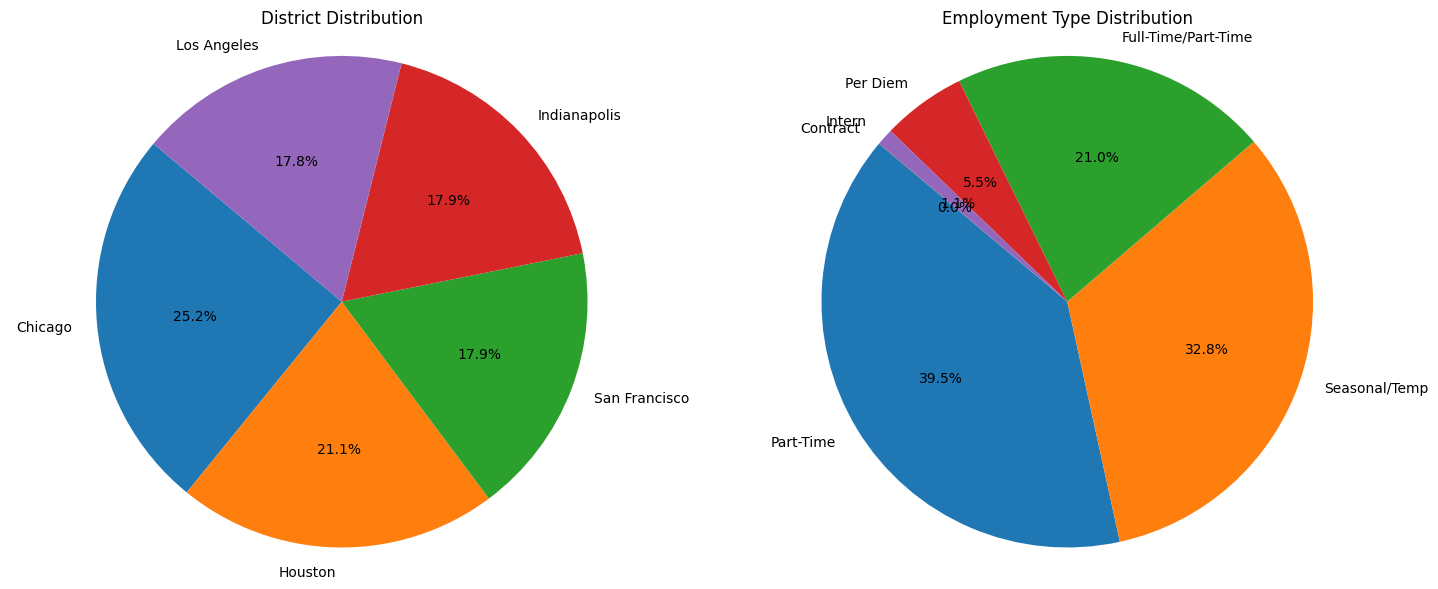

In [ ]:
# Plotting the pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for district distribution
axes[0].pie(district_data.values(), labels=district_data.keys(), autopct='%1.1f%%', startangle=140)
axes[0].set_title('District Distribution')

# Pie chart for employment type distribution
axes[1].pie(employment_data.values(), labels=employment_data.keys(), autopct='%1.1f%%', startangle=140)
axes[1].set_title('Employment Type Distribution')

# Equal aspect ratio ensures that pie charts are drawn as circles.
axes[0].axis('equal')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['Employment.Type'], dtype='object')


In [ ]:
# Employment type counts
employment_type_counts = {
    'Part-Time': 33238,
    'Seasonal/Temp': 27609,
    'Full-Time/Part-Time': 17626,
    'Per Diem': 4644,
    'Intern': 921,
    'Full-Time': 37,
    'Contract': 14,
    'Temporary/seasonal': 1
}

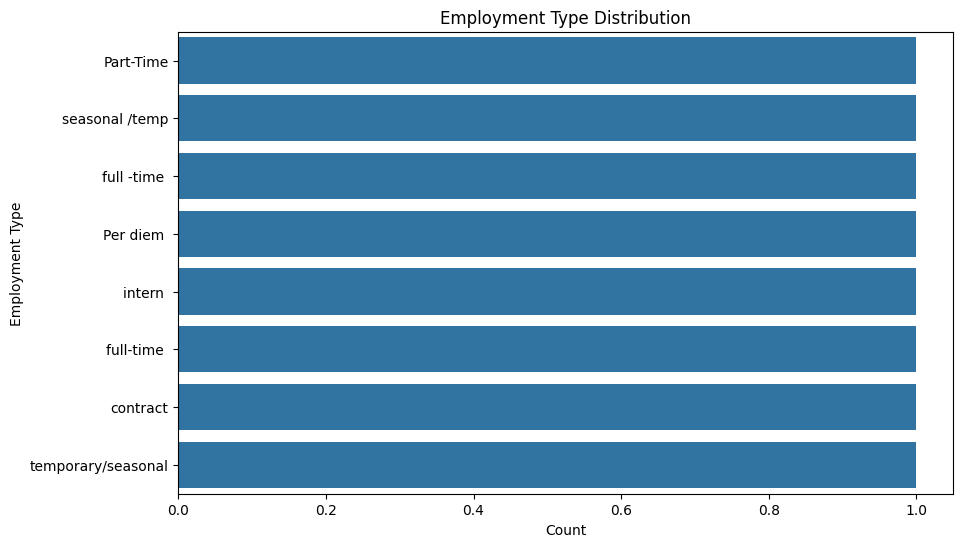

In [ ]:
# Count the occurrences of each employment type
employment_type_counts = df['Employment.Type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_type_counts, y=employment_type_counts.index, orient='h')
plt.title('Employment Type Distribution')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.show()

In [ ]:
# Employment type counts
employment_type_counts = {
    'Part-Time': 33238,
    'Seasonal/Temp': 27609,
    'Full-Time/Part-Time': 17626,
    'Per Diem': 4644,
    'Intern': 921,
    'Full-Time': 37,
    'Contract': 14,
    'Temporary/seasonal': 1
}

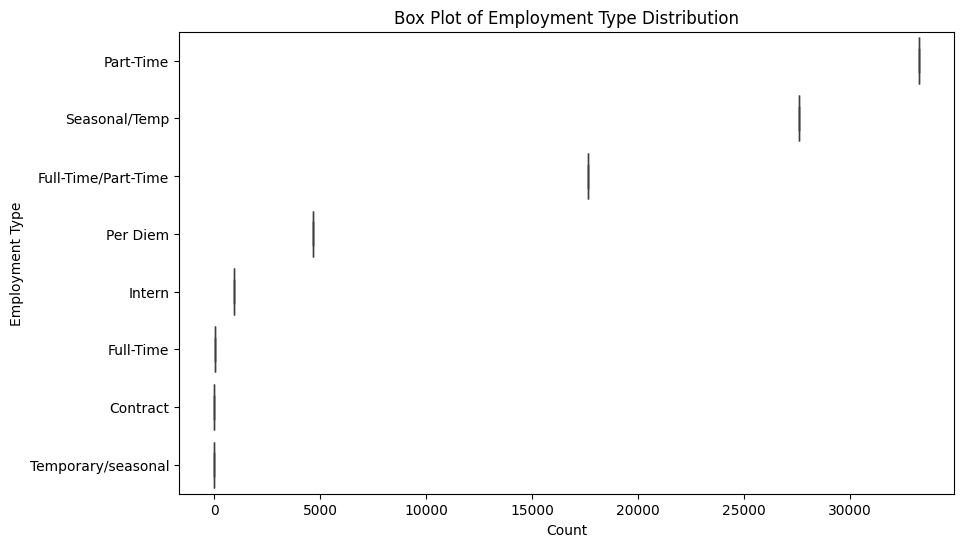

In [ ]:
# Convert employment type counts to a DataFrame
df_employment_type = pd.DataFrame(list(employment_type_counts.items()), columns=['Employment.Type', 'Count'])

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Count', y='Employment.Type', data=df_employment_type, orient='h')
plt.title('Box Plot of Employment Type Distribution')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.show()

In [ ]:
print(f"/content/drive/MyDrive/Combined_Jobs_Final.csv.zip")

/content/drive/MyDrive/Combined_Jobs_Final.csv.zip
